# Standard Analysis Notebook
CellPLATO


In [1]:
from initialization.config import *

import initialization
import data_processing as dp
import visualization as vis

import os
import numpy as np
import pandas as pd

# from data_processing.cell_identifier import *
# from data_processing.cleaning_formatting_filtering import *
# from data_processing.clustering import *
# from data_processing.data_io import *
# from data_processing.data_wrangling import *
# from data_processing.dimensionality_reduction import *
# from data_processing.measurements import *
# from data_processing.migration_calculations import *
# from data_processing.pipelines import *
# from data_processing.shape_calculations import *
# from data_processing.statistics import *
# from data_processing.time_calculations import *
# from data_processing.trajectory_clustering import *

# from visualization.comparative_visualization import *
# from visualization.cluster_visualization import *
# from visualization.filter_visualization import *
# from visualization.low_dimension_visualization import *
# from visualization.panel_apps import *
# from visualization.plots_of_differences import *
# from visualization.small_multiples import *
# from visualization.superplots import *
# from visualization.timecourse_visualization import *
# from visualization.trajectory_visualization import *

Dataset in current notebook:  consistency_test_btrack_v2
Initializing:  consistency_test_btrack_v2
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/consistency_test_btrack_v2\2022-07-15_17-50-29-724294\plots/
Using unique embedding per dataset shortname:  consistency_test_btrack_v2
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Dataset in current notebook:  consistency_test_btrack_v2
Finished running cellPLATO initialization and loaded config.


Finished intializing visualizations
Finished initializing data_processing


In [2]:
if os.path.exists(SAVED_DATA_PATH + 'dr_df.csv'):
    print(SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(SAVED_DATA_PATH + 'tavg_df.csv')
else:
    
    print('File doesnt exist.')

NameError: name 'SAVED_DATA_PATH' is not defined

# Load the data from h5 files in folder structure

In [4]:
# Get the experiment list from the experiments listed in the config 
exp_list = populate_experiment_list()
display(exp_list)

Condition                   Experiment                 Replicate_ID  \
0     CAMKO_20x  Condition_20x_ICAMKO_tracks  Condition_20x_ICAMKO_tracks   
1     CAMWT_20x  Condition_20x_ICAMWT_tracks  Condition_20x_ICAMWT_tracks   
2   NK92KO_100x                       NK92KO                       NK92KO   
3   NK92KO_100x                    NK92KO2_4                    NK92KO2_4   
4   NK92KO_100x                    NK92KO2_6                    NK92KO2_6   
5   NK92KO_100x                     NK92KO_1                     NK92KO_1   
6   NK92KO_100x                     NK92KO_3                     NK92KO_3   
7   NK92KO_100x                     NK92KO_4                     NK92KO_4   
8   NK92KO_100x                     NK92KO_5                     NK92KO_5   
9   NK92KO_100x                     NK92KO_7                     NK92KO_7   
10  NK92KO_100x                     NK92KO_x                     NK92KO_x   
11  NK92WT_100x                       NK92WT                       NK92WT   
12  NK92WT_100x                    NK92WT2_3                    NK92WT2_3   
13  NK92WT_100x                    NK92WT2_6                    NK92WT2_6   
14  NK92WT_100x                    NK92WT2_7                    NK92WT2_7   
15  NK92WT_100x                     NK92WT_2                     NK92WT_2   
16  NK92WT_100x                     NK92WT_3                     NK92WT_3   
17  NK92WT_100x                     NK92WT_4                     NK92WT_4   
18  NK92WT_100x                     NK92WT_5                     NK92WT_5   
19  NK92WT_100x                     NK92WT_8                     NK92WT_8   
20  NK92WT_100x              WT_100x_mScar_2              WT_100x_mScar_2   
21  NK92WT_100x              WT_100x_mScar_8              WT_100x_mScar_8   
22  NK92WT_100x              WT_100x_mScar_9              WT_100x_mScar_9   

   Condition_shortlabel Replicate_shortlabel  
0                KO_20x             KO_20x_0  
1                WT_20x             WT_20x_0  
2               KO_100x            KO_100x_0  
3               KO_100x            KO_100x_1  
4               KO_100x            KO_100x_2  
5               KO_100x            KO_100x_3  
6               KO_100x            KO_100x_4  
7               KO_100x            KO_100x_5  
8               KO_100x            KO_100x_6  
9               KO_100x            KO_100x_7  
10              KO_100x            KO_100x_8  
11              WT_100x            WT_100x_0  
12              WT_100x            WT_100x_1  
13              WT_100x            WT_100x_2  
14              WT_100x            WT_100x_3  
15              WT_100x            WT_100x_4  
16              WT_100x            WT_100x_5  
17              WT_100x            WT_100x_6  
18              WT_100x            WT_100x_7  
19              WT_100x            WT_100x_8  
20              WT_100x            WT_100x_9  
21              WT_100x           WT_100x_10  
22              WT_100x           WT_100x_11

##### Optionally, override the experiment list in the config and select a subset.

In [5]:
# Local overide to CONDITION_SHORTLABELS in Notebook.
# conditions_to_include = ['WT_20x', 'KO_20x','WT_100x', 'KO_100x']
# conditions_to_include = ['WT_20x', 'KO_20x']
# conditions_to_include = ['WT_100x', 'KO_100x']

# conditions_to_include = ['WT Day 0', 'WT Day 7']
# # conditions_to_include = ['WT Day 0']
# # conditions_to_include = ['WT Day 7']

# # Filter exp_list using CONDITION_SHORTLABELS
# exp_list = exp_list[exp_list['Condition_shortlabel'].isin(conditions_to_include)]
# display(exp_list)

In [6]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'comb_df' in locals():
    
    print('Using loaded comb_df')
    
else: 

    # Load, process and combine the dataframes (including segmentation and migration calculations)
    comb_df = combine_dataframes(exp_list)
    comb_df = measurement_pipeline(comb_df)

Using loaded comb_df


In [7]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
# comb_df = combine_dataframes(exp_list)
# comb_df = measurement_pipeline(comb_df)

## Filtering data (upstream of dimensionality reduction)

Applying filters:
{'area': (0, 10000), 'ntpts': (0, 1000)}
Beginning filtering ...
1117936  data points from  15892  cells
Applying filters to entire cell trajectory:
{'area': (0, 10000), 'ntpts': (0, 1000)}
...
 Finished filtering. Resulting dataframe contains:
534688  data points from  15571  cells


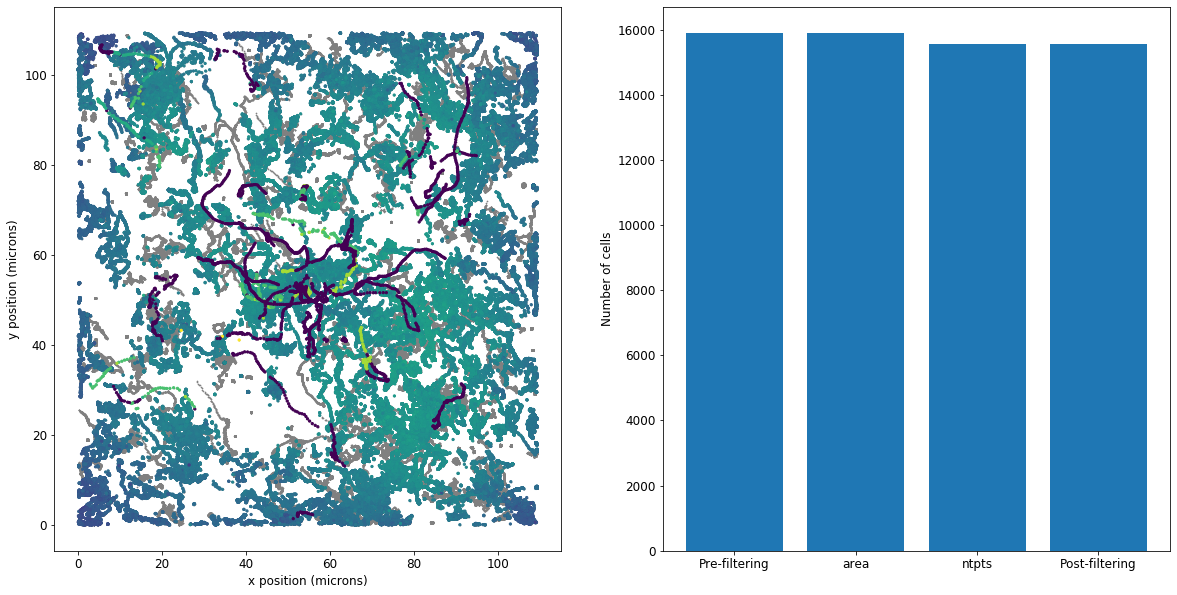

In [8]:
# User-defined filters in dict {factor:(min, max)}
data_filters = {
#   "speed": (10, 100),
  "area": (0, 10000), # Warning: range will change if self-normalized
  "ntpts": (0,1000)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = apply_filters(comb_df,filter_dict=data_filters)

fig = visualize_filtering(comb_df, filt_counts)

# Time-averaged dataframe and summaries

In [9]:
''' To go into preprocessed conditional'''

if 'tavg_df' in locals():
    
    print('Using loaded tavg_df')
    
else: 
    # Process a time-averaged DataFrame
    tavg_df = time_average(filt_df)
display(tavg_df)

Using loaded tavg_df


Unnamed: 0   Cond_label    Condition Condition_shortlabel       MSD  \
0               0    CAMKO_20x    CAMKO_20x               KO_20x  0.002694   
1               1    CAMKO_20x    CAMKO_20x               KO_20x  0.002644   
2               2    CAMKO_20x    CAMKO_20x               KO_20x  0.003774   
3               3    CAMKO_20x    CAMKO_20x               KO_20x  0.002651   
4               4    CAMKO_20x    CAMKO_20x               KO_20x  0.002561   
...           ...          ...          ...                  ...       ...   
15566       15566  NK92WT_100x  NK92WT_100x              WT_100x  0.265255   
15567       15567  NK92WT_100x  NK92WT_100x              WT_100x  0.264129   
15568       15568  NK92WT_100x  NK92WT_100x              WT_100x  0.251840   
15569       15569  NK92WT_100x  NK92WT_100x              WT_100x  0.216749   
15570       15570  NK92WT_100x  NK92WT_100x              WT_100x  0.327002   

       Rep_label                 Replicate_ID Replicate_shortlabel         _  \
0            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
1            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
2            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.047619   
3            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
4            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.008333   
...          ...                          ...                  ...       ...   
15566       22.0              WT_100x_mScar_9           WT_100x_11  0.041667   
15567       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15568       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15569       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15570       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   

             area  ...  turn_angle        uniq_id  unique_id           x  \
0       55.795405  ...    3.857818            inf        0.0  703.551700   
1       91.610769  ...   -0.044095            inf        1.0  113.454665   
2      249.919800  ...    0.182181   3.367003e+39        2.0  835.733567   
3       83.518526  ...    5.000860            inf        3.0  749.611425   
4      143.836054  ...   -4.657220            inf        4.0  638.229060   
...           ...  ...         ...            ...        ...         ...   
15566  418.921772  ...   -4.576168  4.608775e+141    15566.0  158.428015   
15567  400.936185  ...   -9.038936  4.728132e+138    15567.0  753.432219   
15568  276.338311  ...    2.152941   9.175843e+69    15568.0   66.026301   
15569   35.892615  ...   14.178595   5.580581e+10    15569.0  845.464661   
15570  395.723236  ...  -28.676176   1.121120e+05    15570.0  131.587257   

            x_pix       x_um           y       y_pix       y_um         z  
0      703.551700  75.280032    8.205814    8.205814   0.878022  0.000000  
1      113.454665  12.139649   13.563370   13.563370   1.451281  0.000000  
2      835.733567  89.423492   20.574038   20.574038   2.201422  0.018385  
3      749.611425  80.208422   68.239388   68.239388   7.301614  0.000000  
4      638.229060  68.290509  105.183373  105.183373  11.254621  0.000395  
...           ...        ...         ...         ...        ...       ...  
15566  158.428015  16.951798  268.086266  268.086266  28.685230  0.023687  
15567  753.432219  80.617247  833.766415  833.766415  89.213006  0.000000  
15568   66.026301   7.064814  316.551136  316.551136  33.870972  0.000000  
15569  845.464661  90.464719  775.387787  775.387787  82.966493  0.000000  
15570  131.587257  14.079837  242.732147  242.732147  25.972340  0.000000  

[15571 rows x 52 columns]

In [10]:
# Average, n per condition
factor = 'speed'
stats_table(tavg_df, factor)

Returning stats_table using test:  st.ttest_ind  for factor:  speed
Note: for exploratory purposes only, no multiple comparison correction is being applied.


CAMKO_20x      CAMWT_20x    NK92KO_100x    NK92WT_100x
CAMKO_20x              NaN   5.547276e-09  1.191408e-240  9.031138e-203
CAMWT_20x     5.547276e-09            NaN  7.385958e-239  7.856485e-208
NK92KO_100x  1.191408e-240  7.385958e-239            NaN   6.335046e-01
NK92WT_100x  9.031138e-203  7.856485e-208   6.335046e-01            NaN

In [11]:
# Time-averaged plots of differences
ctl_label = CONDITIONS_TO_INCLUDE[0]

plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=ctl_label)#, ='CTL_LABEL')

KO_20x vs WT_20x: P = 0.0
P =  5.547275830937819e-09  (Using t-test without multiple comparison correction)
------
WT_100x vs WT_20x: P = 0.0
P =  7.856485364767383e-208  (Using t-test without multiple comparison correction)
------
KO_100x vs WT_20x: P = 0.0
P =  7.385958479665361e-239  (Using t-test without multiple comparison correction)
------


In [12]:
# Time-averaged superplots
superplots_plotly(tavg_df, factor, t='timeaverage')

In [13]:

# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df = average_per_condition(tavg_df)

# Per replicate
repavg_df = average_per_condition(tavg_df, avg_per_rep=True)


In [14]:
# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df,std,n = average_per_condition(tavg_df, avg_per_rep=False)

# display(avg_df)
# display(std)
# display(n)

In [15]:
cond_stats = average_per_condition(tavg_df, avg_per_rep=False)
comparative_bar(cond_stats, x='Condition', y=factor, to_plot='avg',title='_per_condition_')

In [16]:
# Average, n per replicate
rep_stats = average_per_condition(tavg_df, avg_per_rep=True)
comparative_bar(rep_stats, x='Replicate_ID', y=factor, to_plot='avg', title='_per_replicate_')

# Dimensionality Reduction

In [17]:
comb_df = filt_df

In [18]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'dr_df' in locals():
    
    print('Using loaded dr_df')
    
else: 

    dr_df = dr_pipeline(comb_df, dr_factors=DR_FACTORS) 

Using loaded dr_df


['KO_20x' 'WT_20x' 'KO_100x' 'WT_100x']


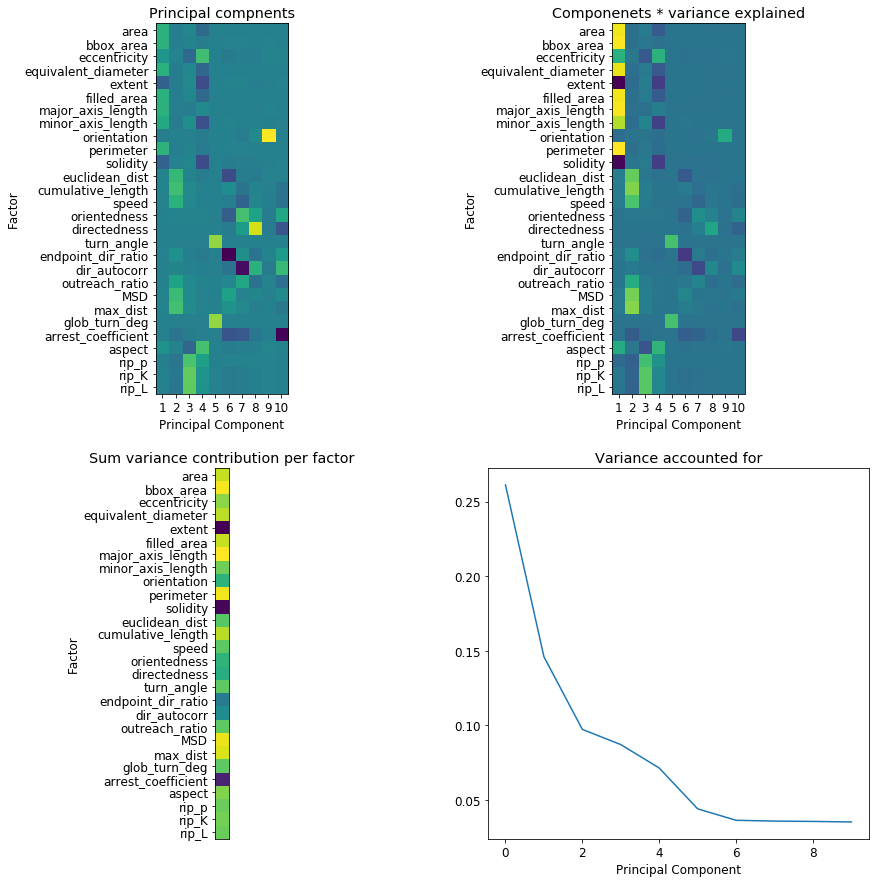

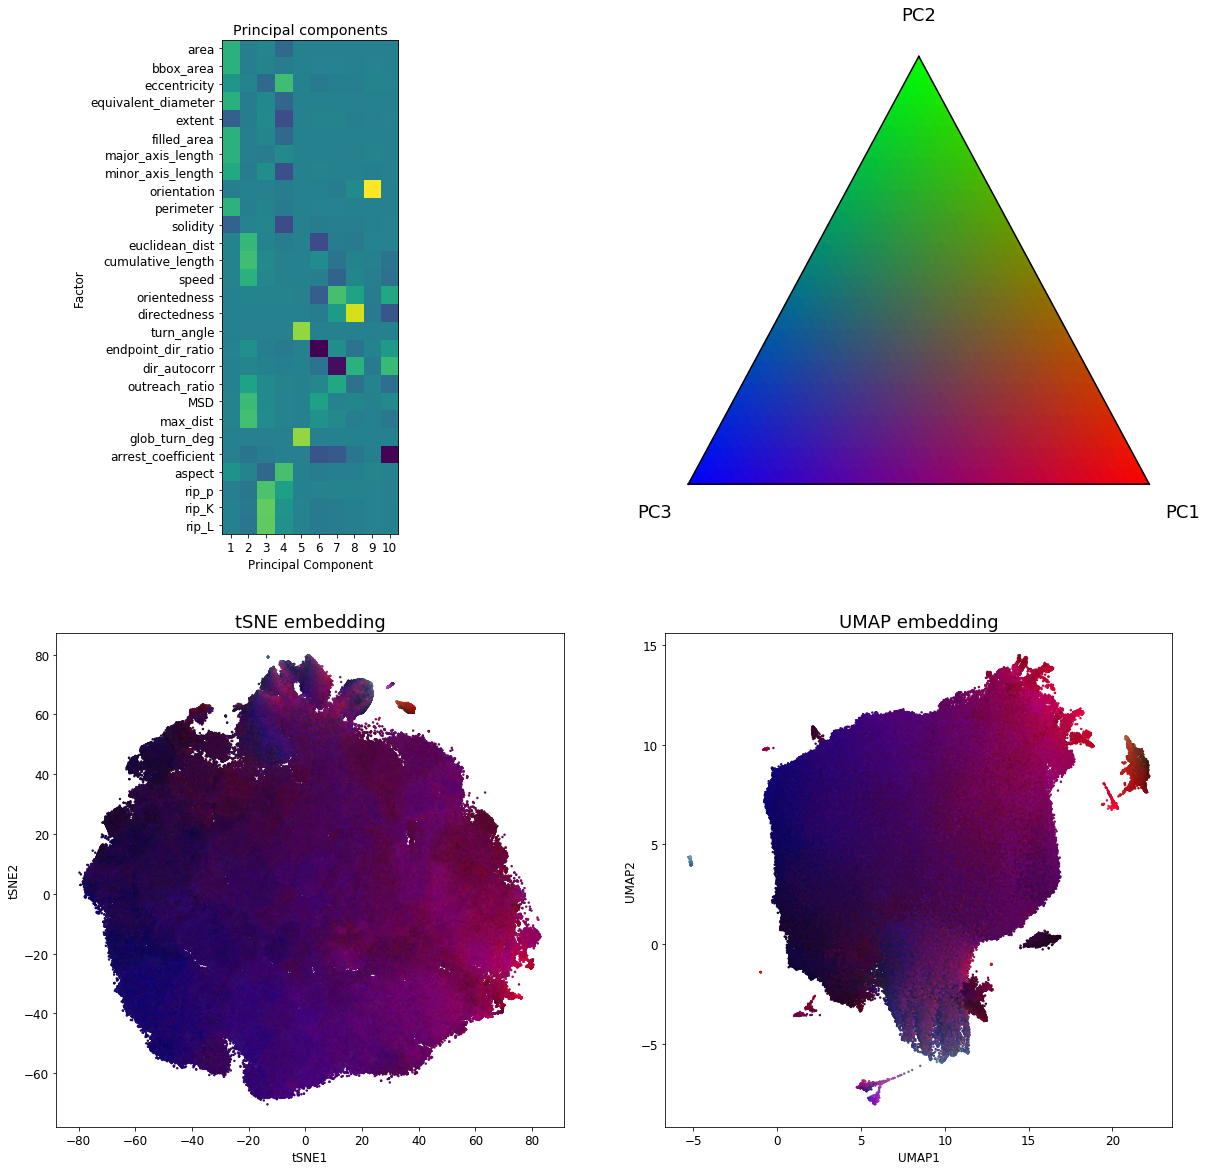

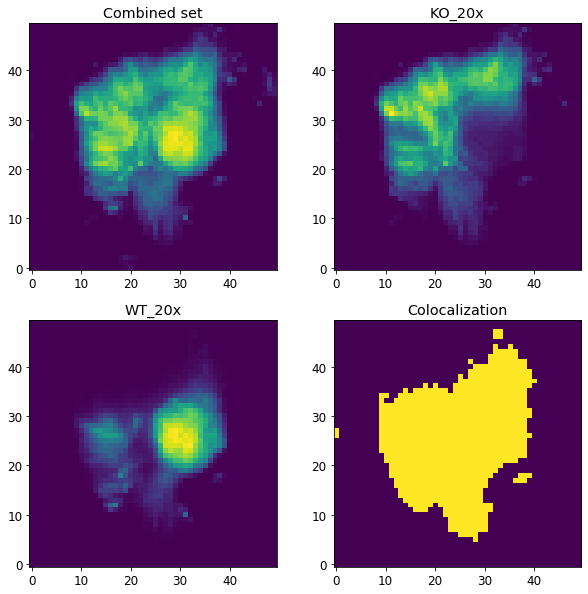

In [19]:
f = pca_factor_vis(dr_df,DR_FACTORS)
f=dimension_reduction_subplots(dr_df)
f=spatial_img_coloc(dr_df, xy='umap',thresh=10,n_bins=50)

##### Dissect the lowd embedding by conditions

['KO_20x' 'WT_20x']
['KO_100x' 'WT_100x']


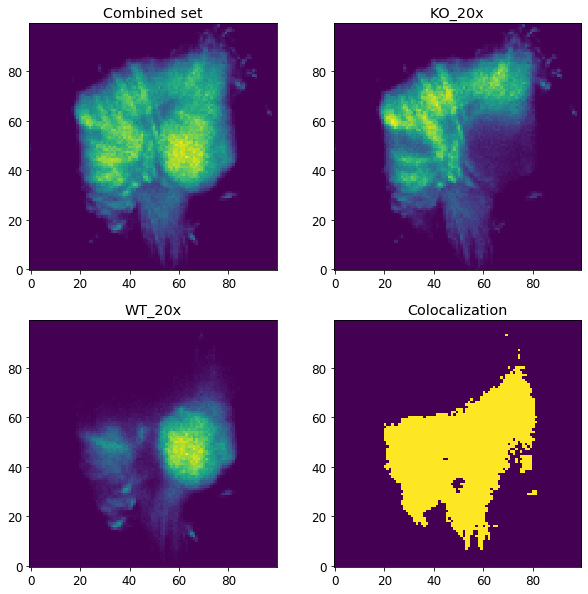

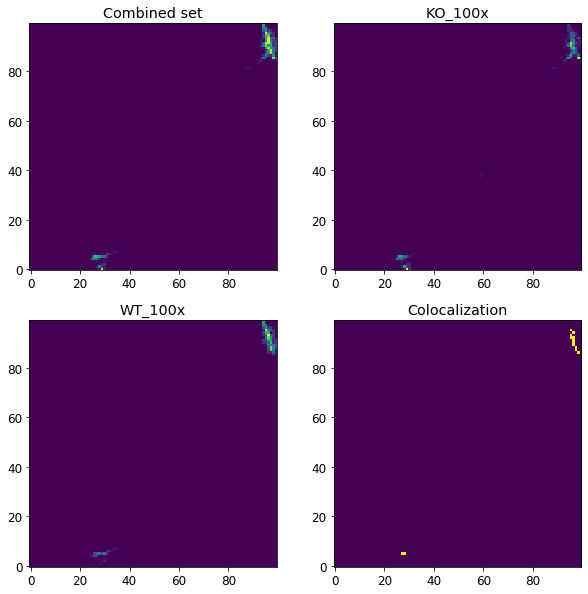

In [28]:
sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('20x')]
sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('100x')]

xy = 'UMAP'
f1=spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
f2=spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

['WT_20x' 'WT_100x']
['KO_20x' 'KO_100x']


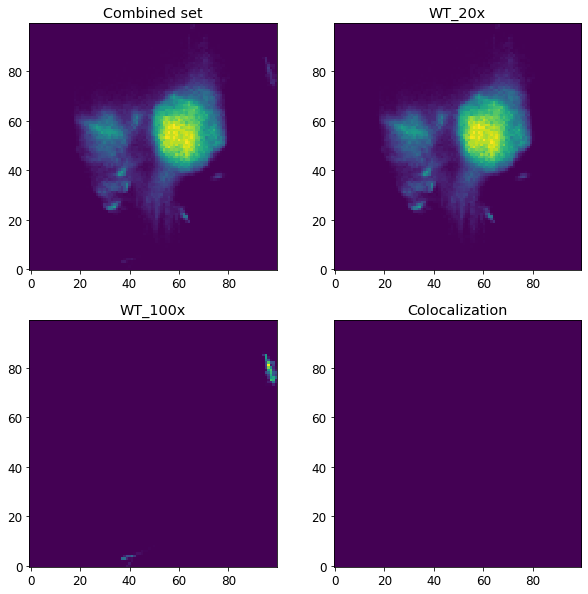

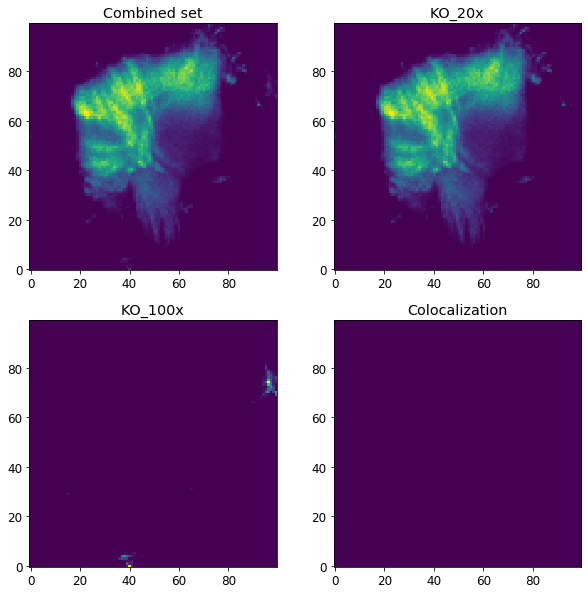

In [29]:
sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('WT')]
sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('KO')]

xy = 'UMAP'
f1=spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
f2=spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

  0%|                                                                                          | 0/16 [00:00<?, ?it/s]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMKO_20x\Condition_20x_ICAMKO_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 56%|██████████████████████████████████████████████▏                                   | 9/16 [00:11<00:04,  1.72it/s]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMWT_20x\Condition_20x_ICAMWT_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (437663, 5)
seg.shape:  (2400, 1024, 1024)


 69%|███████████████████████████████████████████████████████▋                         | 11/16 [00:25<00:13,  2.67s/it]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92KO_100x\NK92KO2_4
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (360, 5)
seg.shape:  (120, 1024, 1024)


 75%|████████████████████████████████████████████████████████████▊                    | 12/16 [00:26<00:09,  2.41s/it]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92KO_100x\NK92KO_5
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 81%|█████████████████████████████████████████████████████████████████▊               | 13/16 [00:27<00:06,  2.07s/it]

coords.shape:  (120, 5)
seg.shape:  (120, 1024, 1024)
loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92KO_100x\NK92KO_x
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 88%|██████████████████████████████████████████████████████████████████████▉          | 14/16 [00:28<00:03,  1.77s/it]

coords.shape:  (120, 5)
seg.shape:  (120, 1024, 1024)
loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92WT_100x\NK92WT_8
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:28<00:00,  1.81s/it]

coords.shape:  (389, 5)
seg.shape:  (120, 1024, 1024)


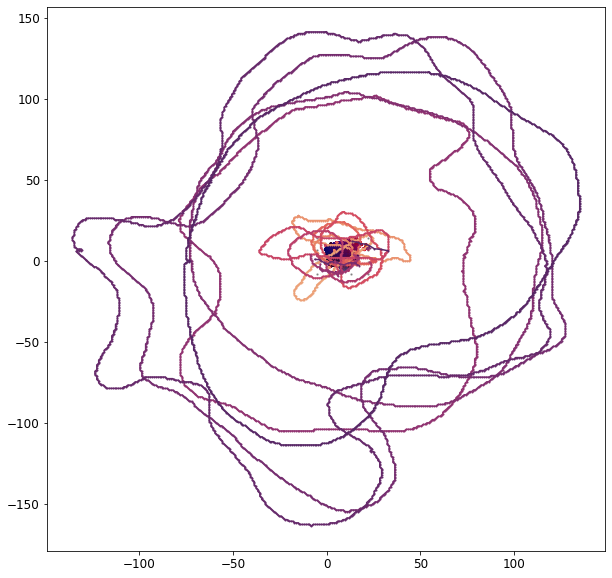

In [22]:
dr_contour_matrix(dr_df,n_grid_pts=4, dr_method='umap',t_window=8) # dr_method='umap'

  0%|                                                                                          | 0/36 [00:00<?, ?it/s]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMKO_20x\Condition_20x_ICAMKO_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 64%|███████████████████████████████████████████████████▋                             | 23/36 [00:13<00:01,  9.66it/s]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMWT_20x\Condition_20x_ICAMWT_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (437663, 5)
seg.shape:  (2400, 1024, 1024)


 97%|██████████████████████████████████████████████████████████████████████████████▊  | 35/36 [00:26<00:00,  2.55it/s]

loading:  Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92KO_100x\NK92KO_1
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
coords.shape:  (120, 5)
seg.shape:  (120, 1024, 1024)


100%|█████████████████████████████████████████████████████████████████████████████████| 36/36 [00:28<00:00,  1.28it/s]


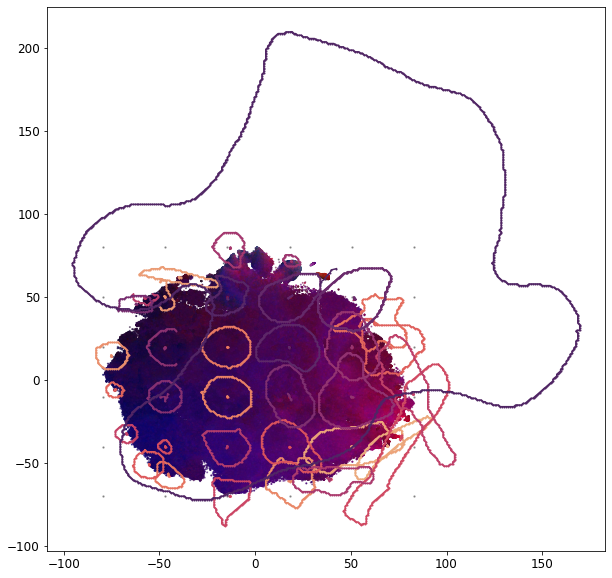

In [23]:
dr_contour_matrix(dr_df,n_grid_pts=6, dr_method='tSNE',t_window=8) # dr_method='umap'

### Cluster the cell behaviour

hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...


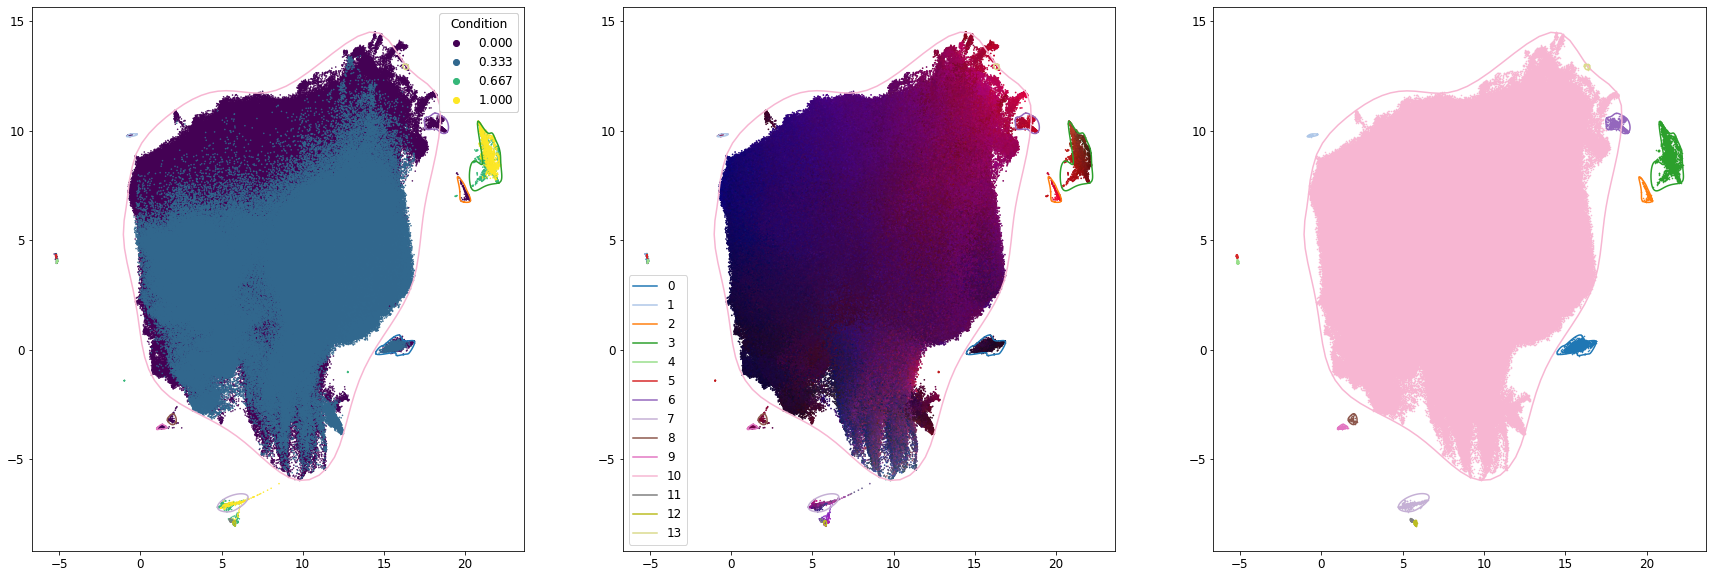

In [24]:

dr_method = CLUSTER_BY

lab_dr_df = hdbscan_clustering(dr_df, cluster_by=dr_method, plot=False)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[30,10])
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='condition',ax=ax1,draw_pts=True,save_path=CLUST_PARAMS_DIR+'condition')
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='PCs',ax=ax2,legend=True,draw_pts=True,save_path=CLUST_PARAMS_DIR+'pca')
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='cluster',ax=ax3,draw_pts=True,save_path=CLUST_PARAMS_DIR+'cluster')


##### Save files to shared folder for reopening in other notebooks and reusing with future analysis

In [25]:
# # Save dr_df to shared data folder
# dr_df.to_csv(SAVED_DATA_PATH + 'dr_df.csv')

# # Save comb_df to shared data folder
# lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [26]:
'''
Note another issue of cyclic dependencies here.
'''

'\nNote another issue of cyclic dependencies here.\n'

In [ ]:
# Run the trajectory clustering pipeline
lab_dr_df, traj_list, cluster_lst = trajectory_clustering_pipeline(lab_dr_df, traj_factor='umap', dist_metric='hausdorff', filename_out='std_dr_df_traj')

plot_traj_cluster_avg(traj_list, cluster_lst, label='')
trajectory_cluster_vis(lab_dr_df,traj_factor='umap', scatter=True)
datashader_lines(lab_dr_df, 'UMAP1', 'UMAP2',color_by='traj_id', categorical=True, identifier='traj_id')

# Overwrite saved lab_dr_df
lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')


Defining trajectories using: ( UMAP1 UMAP2 )


### Cluster switching analysis

In [ ]:
# Count the cluster changes
sum_labels, tptlabel_dr_df = count_cluster_changes(lab_dr_df)
display(sum_labels)

time_superplot(tptlabel_dr_df, 'n_changes',t_window=None)

### Cluster Purity

In [ ]:
clust_sum_df = cluster_purity(lab_dr_df) 
display(clust_sum_df)
trajclust_sum_df = cluster_purity(lab_dr_df, cluster_label='traj_id')
display(trajclust_sum_df)

In [ ]:
'''Note: accepts multiple dataframe inputs, could accept just one..'''
f=purity_plots(lab_dr_df, clust_sum_df,lab_dr_df,trajclust_sum_df)

In [ ]:
clust_sum_t_df = cluster_composition_timecourse(lab_dr_df)
cluster_timeplot(clust_sum_t_df)

In [ ]:
# Count the number of cells that fall into each cluster - show on per condition and replicate basis.
lab_count_df = get_label_counts(lab_dr_df, per_rep=True)

# Plot the counts per subgroup in a swarm plot
fig = px.strip(lab_count_df, x="label", y="count", color="Condition")
fig.show()

In [ ]:
'''
Some of the above should be saved to the shared data folder as they
are very time-consuming
'''

In [ ]:
# Save dataframes to shared data folder
# tavg_df.to_csv(SAVED_DATA_PATH + 'tavg_df.csv')
# comb_df.to_csv(SAVED_DATA_PATH + 'comb_df.csv')
# dr_df.to_csv(SAVED_DATA_PATH + 'dr_df.csv')
# lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [30]:
'''
!!!!!!!!!!!!!!!!!!!!
DEVELOPMENT BOOKMARK
!!!!!!!!!!!!!!!!!!!!
'''

# # Re-import the module we're testing
import importlib

import data_processing.pipelines
from data_processing.pipelines import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.pipelines)

import data_processing.data_wrangling
from data_processing.data_wrangling import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.data_wrangling)

import data_processing.time_calculations
from data_processing.time_calculations import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.time_calculations)

import data_processing.trajectory_clustering
from data_processing.trajectory_clustering import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.trajectory_clustering)

import visualization.trajectory_visualization 
from visualization.trajectory_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.trajectory_visualization )

import visualization.low_dimension_visualization 
from visualization.low_dimension_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.low_dimension_visualization )

import visualization.timecourse_visualization 
from visualization.timecourse_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.timecourse_visualization)

import visualization.superplots
from visualization.superplots import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.superplots)

import visualization.cluster_visualization
from visualization.cluster_visualization import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.cluster_visualization)

<module 'visualization.cluster_visualization' from 'E:\\Documents\\Professional\\Jupyter notebooks\\Git\\cellPLATO\\new_module\\visualization\\cluster_visualization.py'>

In [ ]:
#Minimal pipelines:
comb_df = combine_dataframes(populate_experiment_list())
comb_df = measurement_pipeline(comb_df)
dr_df = dr_pipeline(comb_df, dr_factors=DR_FACTORS) 
comparative_visualization_pipeline(dr_df)
lab_dr_df = cluster_analysis_pipeline(dr_df,CLUSTER_BY)
lab_dr_df, traj_list, cluster_lst = trajectory_clustering_pipeline(lab_dr_df, traj_factor=CLUSTER_BY, dist_metric='hausdorff', filename_out='std_dr_df_traj')

cluster_switching_pipeline(lab_dr_df) # Not generating plots in notebook.

lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [ ]:
'''

plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=CTL_LABEL)
ValueError: 'NK92WT_20x' is not in list

'''